<a href="https://colab.research.google.com/github/EZZRITOE/Mchezo-pesa-LTD/blob/main/Copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEFINING THE QUESTION
A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly 

#METRIC FOR SUCCESS
Using Polynomial regression, the Root Mean Squared Error will be used to measure the performace of the model.

The prediction of model using logistic regression model will be measured using the accuracy score

#UNDERSTANDING THE CONTEXT
You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

#EXPERIMENTAL DESIGN
Perform your EDA,
Perform any necessary feature engineering,
Check of multicollinearity,
Build the model,
Cross-validate the model,
Compute RMSE,
Create residual plots for your models, and assess their ,heteroscedasticity using Bartlett’s test,
Perform appropriate regressions on the data including your justification,
Challenge your solution by providing insights on how you can make improvements.

#1. LOADING THE DATA

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
#reading the fifa dataset
fifa_df=pd.read_csv('fifa_ranking.csv')

In [ ]:
#reading the results dataset
results_df=pd.read_csv('results.csv')

In [ ]:
#checking the top  of fifa dataset
fifa_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
#checking the top of results dataset
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
#checking the bottom of the fifa dataset
fifa_df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
#checking the bottom of the results dataset
results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


#2.Exploratory Data Analysis
Cleaning the Dataset

In [ ]:
#checking for duplicates
dup1=fifa_df.duplicated().value_counts()
dup2=results_df.duplicated().value_counts()
print(dup1)
print(dup2)
#fifa_df has 37 duplicated records

False    57756
True        37
dtype: int64
False    40839
dtype: int64


In [ ]:
#checking the shape
fifa_df.shape
  


(57793, 18)

In [ ]:
#dropping the duplicates
drop=fifa_df.drop_duplicates()

In [ ]:
print('Fifa Data : ', fifa_df.shape[0] - drop.shape[0] , 'rows have been dropped')
#confirming the rows dropped

Fifa Data :  37 rows have been dropped


In [ ]:
#finding the missing values
fifa_df.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
results_df.isnull().sum()


date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

No missing values in both datasets

In [ ]:
#checking the datatypes 
fifa_df.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [ ]:
results_df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
#changing the date column
fifa_df.rank_date = pd.to_datetime(fifa_df.rank_date)
results_df.date = pd.to_datetime(results_df.date)


In [ ]:
#confirming the change of date column
results_df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [ ]:
fifa_df.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [ ]:
#creating new columns for the month and year
fifa_df['year'] = fifa_df.rank_date.dt.year
results_df['year'] = results_df.date.dt.year

#  month columns
fifa_df['month'] = fifa_df.rank_date.dt.month
results_df['month'] = results_df.date.dt.month

In [ ]:
#dropping columns we don't need
fifa_df.drop(['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted',], 1)

,rank,country_full,confederation,rank_date,year,month
0,1,Germany,UEFA,1993-08-08,1993,8
1,2,Italy,UEFA,1993-08-08,1993,8
2,3,Switzerland,UEFA,1993-08-08,1993,8
3,4,Sweden,UEFA,1993-08-08,1993,8
4,5,Argentina,CONMEBOL,1993-08-08,1993,8
...,...,...,...,...,...,...
57788,206,Anguilla,CONCACAF,2018-06-07,2018,6
57789,206,Bahamas,CONCACAF,2018-06-07,2018,6
57790,206,Eritrea,CAF,2018-06-07,2018,6
57791,206,Somalia,CAF,2018-06-07,2018,6


In [ ]:
results_df.drop(['city', 'country' ], 1)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,False,1876,3
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,True,2019,7
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,True,2019,7
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,True,2019,7
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,True,2019,7


##Merging the dataset

In [ ]:
home= pd.merge(results_df,fifa_df,  left_on = ['home_team', 'year', 'month'], 
                     right_on = ['country_full', 'year', 'month'],  how = 'inner' )
#fifa home dataset


In [ ]:
#fifa away dataset
away = pd.merge(results_df, fifa_df, how = 'inner', left_on = ['year', 'month', 'away_team'], 
                     right_on = ['year', 'month', 'country_full'])


In [ ]:
#changing the ranks column
home.rename({'rank' : 'home_rank'}, axis = 1, inplace = True)
away.rename({'rank' : 'away_rank'}, axis =1, inplace = True)


In [ ]:
away_2 = away_2[['away_team','away_rank','year','month']]
away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
fifa = pd.merge(home, away_2, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'away_team'])

fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,67
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,5


In [ ]:

fifa.duplicated().sum()

11614

In [ ]:
#droping duplicates in the merged dataset
fifa.drop_duplicates()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,away_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.00,36,16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,67
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,ARG,0.00,51,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,67
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.00,36,16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,5
7,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.00,16,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,5
10,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,67,Paraguay,PAR,0.00,22,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28511,2018-06-18,Tunisia,England,1,2,FIFA World Cup,Volgograd,Russia,True,2018,6,21,Tunisia,TUN,909.91,1012,-7,545.56,545.56,394.79,197.39,227.59,68.28,493.39,98.68,CAF,2018-06-07,12
28512,2018-06-12,Japan,Paraguay,4,2,Friendly,Innsbruck,Austria,True,2018,6,61,Japan,JPN,520.75,528,-1,164.51,164.51,413.01,206.50,273.24,81.97,338.88,67.78,AFC,2018-06-07,32
28513,2018-06-28,Japan,Poland,0,1,FIFA World Cup,Volgograd,Russia,True,2018,6,61,Japan,JPN,520.75,528,-1,164.51,164.51,413.01,206.50,273.24,81.97,338.88,67.78,AFC,2018-06-07,8
28514,2018-06-16,Argentina,Iceland,1,1,FIFA World Cup,Moscow,Russia,True,2018,6,5,Argentina,ARG,1241.45,1254,0,404.07,404.07,809.59,404.80,829.98,248.99,917.94,183.59,CONMEBOL,2018-06-07,22


In [ ]:

fifa.isnull().sum()

date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
year                       0
month                      0
home_rank                  0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
away_rank                  0
dtype: int64

#POLYNOMIAL REGRESSION
##FEATURE ENGINEERING

In [ ]:
#Import the necessarry libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix


In [ ]:
#creating a column of score
#after subtracting the home score from away score, a positive result is a win while a negtive result is a loss
fifa['score'] = fifa.home_score - fifa.away_score

In [ ]:
#creating method to determine draw,loss or win
def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'


In [ ]:
 #Applying the result function 
fifa['result'] = fifa.score.apply(lambda x: result(x))

# Dropping the score column, as it has served its purpose
fifa.drop('score', axis = 1, inplace = True)

# column of total goals scored
fifa['total_goals'] = fifa.home_score + fifa.away_score

# Previewing the last five rows of the dataframe together with the result column
#
fifa.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,away_rank,result,total_goals
28513,2018-06-28,Japan,Poland,0,1,FIFA World Cup,Volgograd,Russia,True,2018,6,61,Japan,JPN,520.75,528,-1,164.51,164.51,413.01,206.50,273.24,81.97,338.88,67.78,AFC,2018-06-07,8,Lose,1
28514,2018-06-16,Argentina,Iceland,1,1,FIFA World Cup,Moscow,Russia,True,2018,6,5,Argentina,ARG,1241.45,1254,0,404.07,404.07,809.59,404.80,829.98,248.99,917.94,183.59,CONMEBOL,2018-06-07,22,Draw,2
28515,2018-06-16,Argentina,Iceland,1,1,FIFA World Cup,Moscow,Russia,True,2018,6,5,Argentina,ARG,1241.45,1254,0,404.07,404.07,809.59,404.80,829.98,248.99,917.94,183.59,CONMEBOL,2018-06-07,22,Draw,2
28516,2018-06-22,Nigeria,Iceland,2,0,FIFA World Cup,Volgograd,Russia,True,2018,6,48,Nigeria,NGA,617.79,635,-1,251.21,251.21,474.22,237.11,198.21,59.46,350.01,70.00,CAF,2018-06-07,22,Win,2
28517,2018-06-22,Nigeria,Iceland,2,0,FIFA World Cup,Volgograd,Russia,True,2018,6,48,Nigeria,NGA,617.79,635,-1,251.21,251.21,474.22,237.11,198.21,59.46,350.01,70.00,CAF,2018-06-07,22,Win,2


In [ ]:
fifa.drop(['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted',], 1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,country_full,confederation,rank_date,away_rank,result,total_goals
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,CONMEBOL,1993-08-08,67,Draw,0
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,CONMEBOL,1993-08-08,67,Draw,0
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,67,Draw,0
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,67,Draw,0
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,CONMEBOL,1993-08-08,5,Win,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28513,2018-06-28,Japan,Poland,0,1,FIFA World Cup,Volgograd,Russia,True,2018,6,61,Japan,AFC,2018-06-07,8,Lose,1
28514,2018-06-16,Argentina,Iceland,1,1,FIFA World Cup,Moscow,Russia,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,22,Draw,2
28515,2018-06-16,Argentina,Iceland,1,1,FIFA World Cup,Moscow,Russia,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,22,Draw,2
28516,2018-06-22,Nigeria,Iceland,2,0,FIFA World Cup,Volgograd,Russia,True,2018,6,48,Nigeria,CAF,2018-06-07,22,Win,2


In [ ]:
#new column to show tournament
def tourn(i):
  if i == 'FIFA World Cup':
    return 'FIFA World Cup'
  if i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

fifa['tournament'] = fifa.tournament.apply(lambda x: tourn(x))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb34539e210>],
      dtype=object)

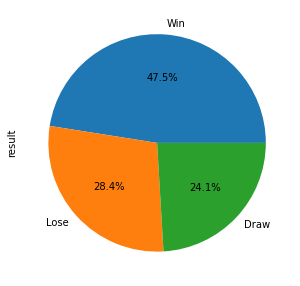

In [ ]:
#pie chart showing the result
fifa['result'].value_counts().plot(kind='pie', subplots=True, figsize=(10, 5), autopct='%1.1f%%')

##SOLUTION IMPLEMENTATION

In [ ]:
#Selection of the required columns
fifa1 = fifa[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'home_rank', 'away_rank']]
fifa1.head()

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank
0,Colombia,Paraguay,0,0,Other,19,67
1,Colombia,Paraguay,0,0,Other,19,67
2,Argentina,Paraguay,0,0,Other,5,67
3,Argentina,Paraguay,0,0,Other,5,67
4,Colombia,Argentina,2,1,Other,19,5


###Multicolleniarity

In [ ]:
#correlation of selected columns
fifa1.corr()
#correlations help in computing the Varince Inflation Factor(VIF) of the variables

,home_score,away_score,home_rank,away_rank
home_score,1.000000,-0.160963,-0.115309,0.307034
away_score,-0.160963,1.000000,0.221202,-0.151864
home_rank,-0.115309,0.221202,1.000000,0.514813
away_rank,0.307034,-0.151864,0.514813,1.000000


###polynomial model

In [ ]:
X = fifa1.iloc[:, [0, 1, 3, 4, 5, 6]]
y = fifa1.home_score
#categorical variables encoding
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

# Standardising the X_train and the X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
print(np.sqrt(mean_squared_error(y_test, y_pred)))


1.327042890671048


###hyperparameter tuning

In [ ]:
#tuning parameters
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###cross validation

In [ ]:
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}
#creating cross validation  fold=10       
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_}')
#
kfold = KFold(n_splits = 10)

#  find the optimal parameters
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
grid_search_results = grid_search.fit(X, y)

#  best parameters and the the best score
print(f'Best score is {grid_search.best_score_}')

Best score is -1.0173961910051045e+17
Best score is -1.0173961910051045e+17


In [ ]:
# cross validation of ten folds
scores = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 10)

#  mean of the cross validation scores
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

#  variance of the cross validation scores from the mean
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 2.6812143133786054e+17
Standard deviation of the cross validation scores is 8.043642940135817e+17


###heteroscedasticity

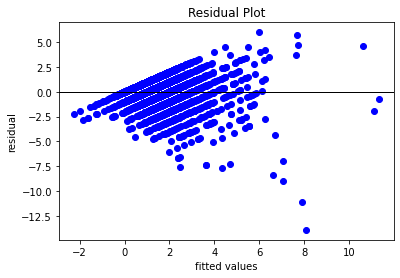

In [ ]:
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=1)
plt.show()

#LOGISTIC REGRESSION

In [ ]:

INFO = fifa[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'home_rank', 'away_rank', 'result']]

#  first five rows of the data
INFO.head()

,home_team,away_team,home_score,away_score,tournament,year,home_rank,away_rank,result
0,Colombia,Paraguay,0,0,Other,1993,19,67,Draw
1,Colombia,Paraguay,0,0,Other,1993,19,67,Draw
2,Argentina,Paraguay,0,0,Other,1993,5,67,Draw
3,Argentina,Paraguay,0,0,Other,1993,5,67,Draw
4,Colombia,Argentina,2,1,Other,1993,19,5,Win


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


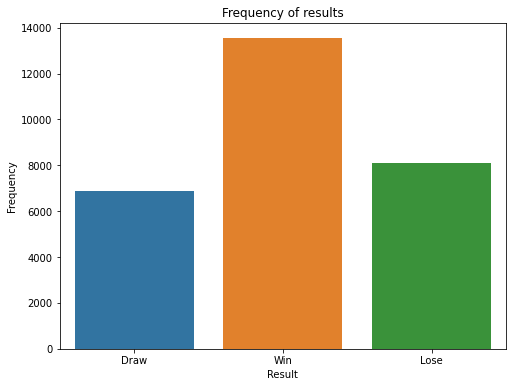

In [ ]:
# Ensuring data is balanced between win,draw and lose
plt.figure(figsize = (8, 6))
ax = sns.countplot(INFO.result)
plt.ylabel('Frequency')
plt.xlabel('Result')
plt.title('Frequency of results')
plt.show()

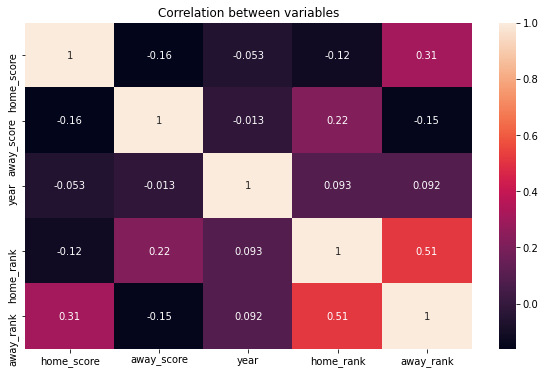

In [ ]:
#  correlations between features
#
plt.figure(figsize = (10, 6))
sns.heatmap(INFO.corr(), annot = True) 
plt.title('Correlation between variables')
plt.show()

###logistic model

In [ ]:
# Spliting the data into features and the target variable
X = INFO.drop('result', axis = 1)
y = INFO.result

# Encoding the categorical features
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Identifying the model and training the model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Test and Training Scores
score = logistic.score(X_train, y_train)
score2 = logistic.score(X_test, y_test)

print('Training set accuracy: ', '%.3f'%(score))
print('Test set accuracy: ', '%.3f'%(score2))

# Making predictions
y_pred = logistic.predict(X_test)

Training set accuracy:  0.885
Test set accuracy:  0.884


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


###Hyperparameter tuning

In [ ]:

LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)